# 6. Analysing Time-Series Data

This Jupyter notebook is broken down into two sections, each looking at a different dataset:
1. Employee Attrition
2. EU Job Vacancies

# Employee Attrition
1. Importing libraries and data 
2. Subsetting and wrangling data 
3. Time-series analysis: decomposition
4. Testing for stationarity and autocorrelation

## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
#create path
path = r'C:\Users\rutha\CareerFoundry\04-23_EmployeeAttrition'

In [3]:
#import data set
df = pd.read_csv(os.path.join(path, '02_data', 'Prepared_data', 'encoded_data.csv'), index_col=False)

In [4]:
#checking output
df.head()

,Unnamed: 0,country,department_name,terminationdate_key,age,length_of_service,job_title,store_number,year_of_record,population,...,large_country,medium_country,small_country,c_suite,associate,director,manager,older_adults,mid_adults,young_adults
0,0,Germany,Executive,01/01/1900,52,17,CEO,35,2006,83783942,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,Germany,Executive,01/01/1900,53,18,CEO,35,2007,83783942,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,Germany,Executive,01/01/1900,54,19,CEO,35,2008,83783942,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,3,Germany,Executive,01/01/1900,55,20,CEO,35,2009,83783942,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,Germany,Executive,01/01/1900,56,21,CEO,35,2010,83783942,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49644 entries, 0 to 49643
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           49644 non-null  int64  
 1   country              49644 non-null  object 
 2   department_name      49644 non-null  object 
 3   terminationdate_key  49644 non-null  object 
 4   age                  49644 non-null  int64  
 5   length_of_service    49644 non-null  int64  
 6   job_title            49644 non-null  object 
 7   store_number         49644 non-null  int64  
 8   year_of_record       49644 non-null  int64  
 9   population           49644 non-null  int64  
 10  gender               49644 non-null  int64  
 11  employment_status    49644 non-null  int64  
 12  business_unit        49644 non-null  int64  
 13  Not Applicable       49644 non-null  float64
 14  Retirement           49644 non-null  float64
 15  Resignaton           49644 non-null 

In [6]:
#dropping index column
df = df.drop(columns=['Unnamed: 0'])

In [7]:
#checking output
df.head()

,country,department_name,terminationdate_key,age,length_of_service,job_title,store_number,year_of_record,population,gender,...,large_country,medium_country,small_country,c_suite,associate,director,manager,older_adults,mid_adults,young_adults
0,Germany,Executive,01/01/1900,52,17,CEO,35,2006,83783942,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,Germany,Executive,01/01/1900,53,18,CEO,35,2007,83783942,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,Germany,Executive,01/01/1900,54,19,CEO,35,2008,83783942,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,Germany,Executive,01/01/1900,55,20,CEO,35,2009,83783942,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,Germany,Executive,01/01/1900,56,21,CEO,35,2010,83783942,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [8]:
df.shape

(49644, 29)

In [9]:
df.columns

Index(['country', 'department_name', 'terminationdate_key', 'age',
       'length_of_service', 'job_title', 'store_number', 'year_of_record',
       'population', 'gender', 'employment_status', 'business_unit',
       'Not Applicable', 'Retirement', 'Resignaton', 'Layoff',
       'Not Applicable.1', 'Voluntary', 'Involuntary', 'large_country',
       'medium_country', 'small_country', 'c_suite', 'associate', 'director',
       'manager', 'older_adults', 'mid_adults', 'young_adults'],
      dtype='object')

In [10]:
#renaning "Not applicable" as "active_employee"
df.rename(columns={'Not Applicable.1' : 'active_employee'}, inplace = True)

In [11]:
#checking output
df.columns

Index(['country', 'department_name', 'terminationdate_key', 'age',
       'length_of_service', 'job_title', 'store_number', 'year_of_record',
       'population', 'gender', 'employment_status', 'business_unit',
       'Not Applicable', 'Retirement', 'Resignaton', 'Layoff',
       'active_employee', 'Voluntary', 'Involuntary', 'large_country',
       'medium_country', 'small_country', 'c_suite', 'associate', 'director',
       'manager', 'older_adults', 'mid_adults', 'young_adults'],
      dtype='object')

In [12]:
#checking datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49644 entries, 0 to 49643
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              49644 non-null  object 
 1   department_name      49644 non-null  object 
 2   terminationdate_key  49644 non-null  object 
 3   age                  49644 non-null  int64  
 4   length_of_service    49644 non-null  int64  
 5   job_title            49644 non-null  object 
 6   store_number         49644 non-null  int64  
 7   year_of_record       49644 non-null  int64  
 8   population           49644 non-null  int64  
 9   gender               49644 non-null  int64  
 10  employment_status    49644 non-null  int64  
 11  business_unit        49644 non-null  int64  
 12  Not Applicable       49644 non-null  float64
 13  Retirement           49644 non-null  float64
 14  Resignaton           49644 non-null  float64
 15  Layoff               49644 non-null 

## 2. Subsetting and wrangling data 

We have two time based variables in our dataset:
    
    1. terminationdate_key
    2. year

As discussed in the first notebook, *terminationdate_key* is a record of when employees were terminated from the company. Since only 3% of the dataset are terminated, 97% of the records in this variable are **01/01/1900**. This makes *terminationdate_key* an unsuitable variable for time-series analsysis. 

We will therefore be using **year** as our time-series variable and comparing this against the **average age of employees** to see if there is a link with termination rates. 

In [13]:
#creating a subset for our analyses
df_subset = df.groupby('year_of_record').agg({'age': ['mean']})

In [14]:
#checking output
df_subset

,age
,mean
year_of_record,
2006,43.751420
2007,43.272106
2008,42.670164
2009,42.062667
2010,41.492140
2011,41.133241
2012,41.004398
2013,40.995300


In [15]:
#restting index
df_subset.reset_index(inplace = True)

In [16]:
#checking output
df_subset.head()

,year_of_record,age
,,mean
0,2006,43.751420
1,2007,43.272106
2,2008,42.670164
3,2009,42.062667
4,2010,41.492140


In [17]:
#checking datatypes 
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (year_of_record, )  10 non-null     int64  
 1   (age, mean)         10 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 288.0 bytes


In [18]:
#converting year of record to datetime 
df_subset['year_of_record'] = pd.to_datetime(df_subset['year_of_record'], format='%Y')

In [19]:
#checking output
df_subset

,year_of_record,age
,,mean
0,2006-01-01,43.751420
1,2007-01-01,43.272106
2,2008-01-01,42.670164
3,2009-01-01,42.062667
4,2010-01-01,41.492140
5,2011-01-01,41.133241
6,2012-01-01,41.004398
7,2013-01-01,40.995300
8,2014-01-01,41.853855


In [20]:
#confirming datatype conversion
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   (year_of_record, )  10 non-null     datetime64[ns]
 1   (age, mean)         10 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 288.0 bytes


In [21]:
#setting datetime variable as index
from datetime import datetime

df_subset.set_index('year_of_record', inplace = True) #set the datetime as the index of the dataframe.
df_subset

,age
,mean
year_of_record,
2006-01-01,43.751420
2007-01-01,43.272106
2008-01-01,42.670164
2009-01-01,42.062667
2010-01-01,41.492140
2011-01-01,41.133241
2012-01-01,41.004398
2013-01-01,40.995300


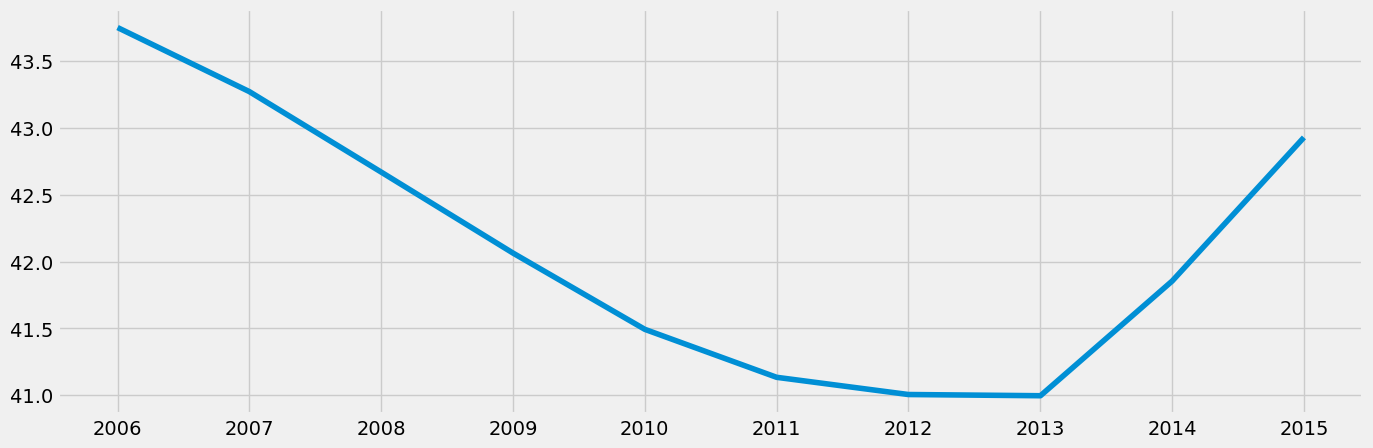

In [24]:
#plotting chart
plt.figure(figsize=(15,5), dpi=100) 
plt.plot(df_subset)

## 3. Time-series analysis: decomposition

In [25]:
#decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(df_subset, model='multiplicative')

In [26]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

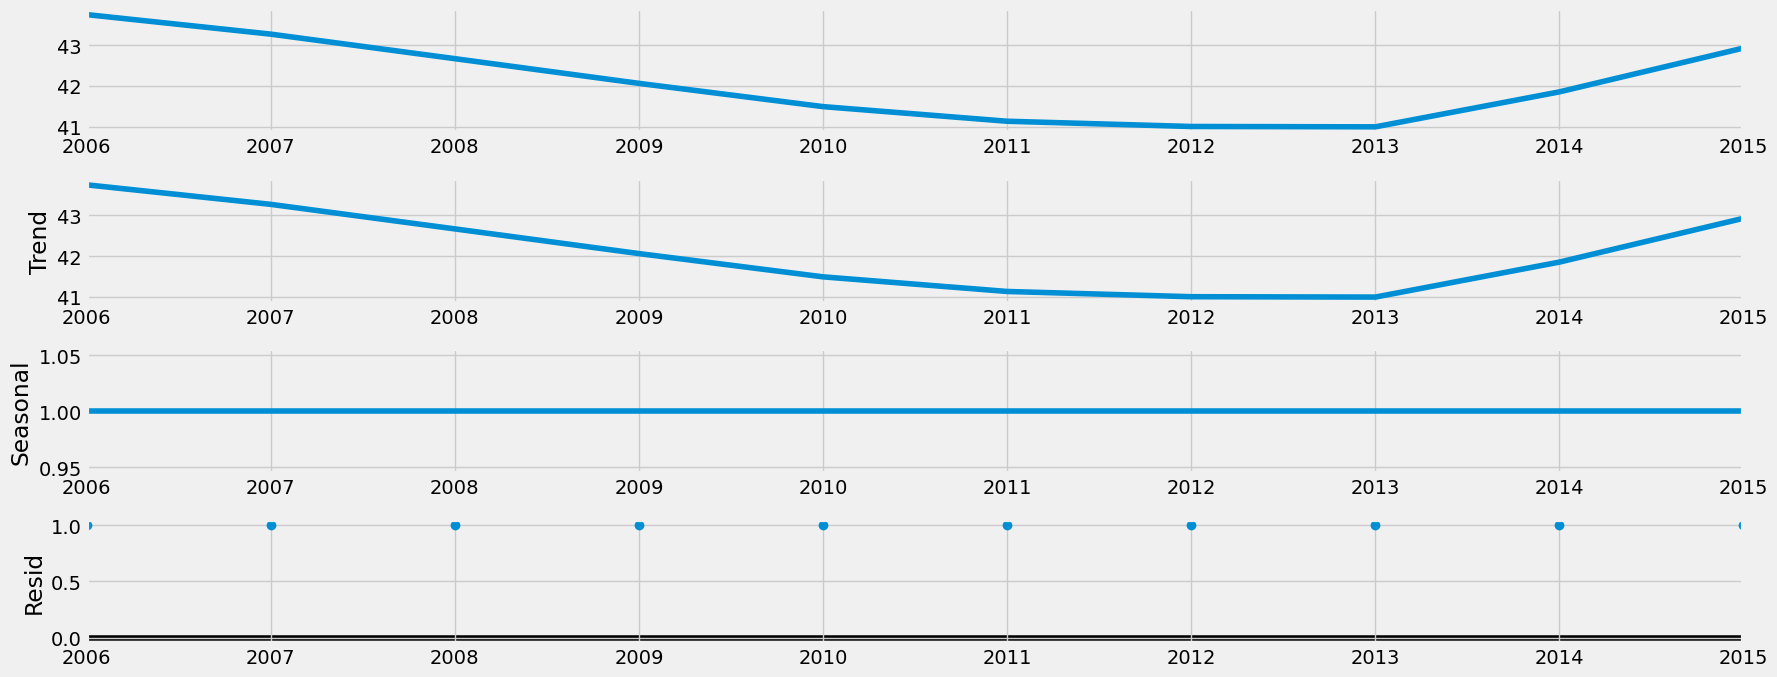

In [27]:
#plot the separate components

decomposition.plot()
plt.show()

## 4. Testing for stationarity and autocorrelation

Although the graph clearly shows a flat line, we are still going to use a model to statistically test for stationarity

In [28]:
#the adfuller() function imports from the model from statsmodels for the test; however, running it will only return 
#an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller #import the adfuller() function

def dickey_fuller(timeseries): #define the function
    #perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

#apply the test using the function on the time series
dickey_fuller(df_subset['age'])

Dickey-Fuller Stationarity test:
Test Statistic                -2.335852
p-value                        0.160666
Number of Lags Used            3.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


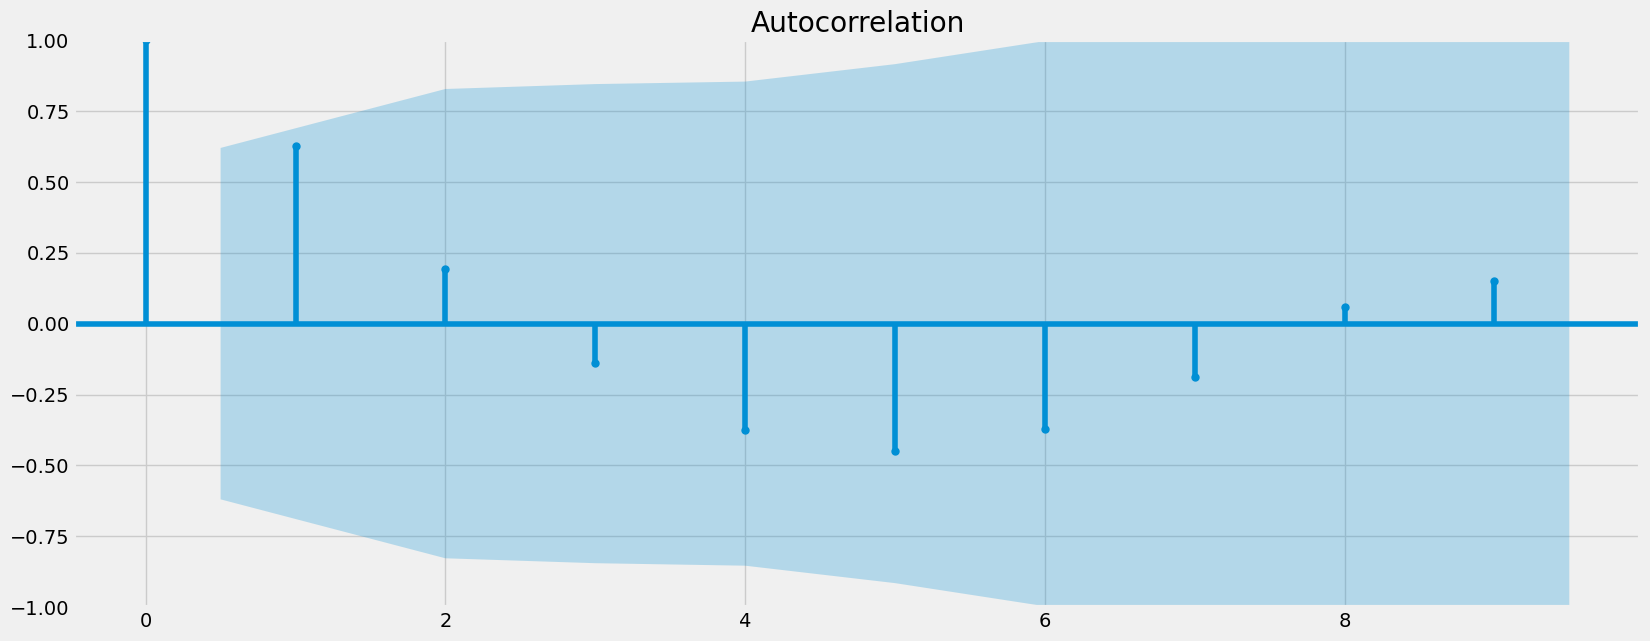

In [29]:
#plotting autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #importing the autocorrelation and partial correlation plots

plot_acf(df_subset)
plt.show()

**Results:** 

The Dickey-Fuller test that looks for the presence of a *unit-root* in the data. A unit-root is any kind of random jump that can't be explained by variation in the data. The null hypothesis in this case would be the *presence of a unit root in the data*. We want to disprove that and therefore reject the null hypothesis, which would mean the data is stationary. 

The results of the Dickey-Fuller statistical test show a test-statistic of **-2.335852** which is **bigger** than the corresponding critical value of **-3.646238**, meaning there is no unit-root in our data so we *can* reject the null hypothesis and determine that our data is stationary. However, the p-value is 0.160666, which is **greater than 0.05** meaning that this test result is *not* statistically significant. Statistical significance would be difficult to prove in a dataset with so few values.  

The second plot looks at autocorrelation in the data. The vertical lines represent the time-lags in our data whilst the blue shared area represents the confidence intervals. We can clearly see the 9 of the 10 lag values within the blue-shared area, meaning there is limited autocorrelation in this dataset, therefore, it is likely stationary. 

# EU Job Vacancies

I'm also looking at the job vacancy statistics (JVS) for the EU during the years 2006 and 2015, which is the same time period defined in our employee attrition data. This could help indicate whether there were any broader market conditions apparent during the time period which could increase or decrease attrition. For example, a high number of job vacancies could indicate a boyant employment market, which may mean increased attrition at employees change jobs more frequently.  

1. What is the JVS and how is it collected?
2. Importing dataset
3. Cleaning, wrangling, and subsetting data
4. Time-series analysis: decomposition
5. Testing for stationarity and autocorrelation

## 1. What is the JVS and how is it collected?

The EU's Job vacancy statistics (JVS) provide information on the level and structure of labour demand. Eurostat publishes quarterly data on the number of job vacancies and the number of occupied posts. The job vacancy rate (JVR) is the number of job vacancies expresses as a percentage of the sum of the number of occupied posts and the number of job vacancies:

    JVR = number of job vacancies / (number of occupied posts + number of job vacancies) x100

## 2. Importing dataset

In [56]:
#import data set
df_job = pd.read_csv(os.path.join(path, '02_data', 'Original_data', 'EUJobVacancy.csv'), index_col=False)

In [57]:
#checking output
df_job

,Quarter,Job Vacancy Rate
0,01/01/2006,1.0
1,04/01/2006,1.4
2,07/01/2006,1.5
3,10/01/2006,1.3
4,01/01/2007,1.5
5,04/01/2007,1.5
6,07/01/2007,1.5
7,10/01/2007,1.6
8,01/01/2008,1.7
9,04/01/2008,1.4


In [58]:
df_job.shape

(56, 2)

In [59]:
df_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Quarter           56 non-null     object 
 1   Job Vacancy Rate  56 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.0+ KB


In [61]:
#converting quarter to datetime
df_job['Quarter'] = pd.to_datetime(df_job['Quarter'])

In [62]:
#checking output
df_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Quarter           56 non-null     datetime64[ns]
 1   Job Vacancy Rate  56 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.0 KB


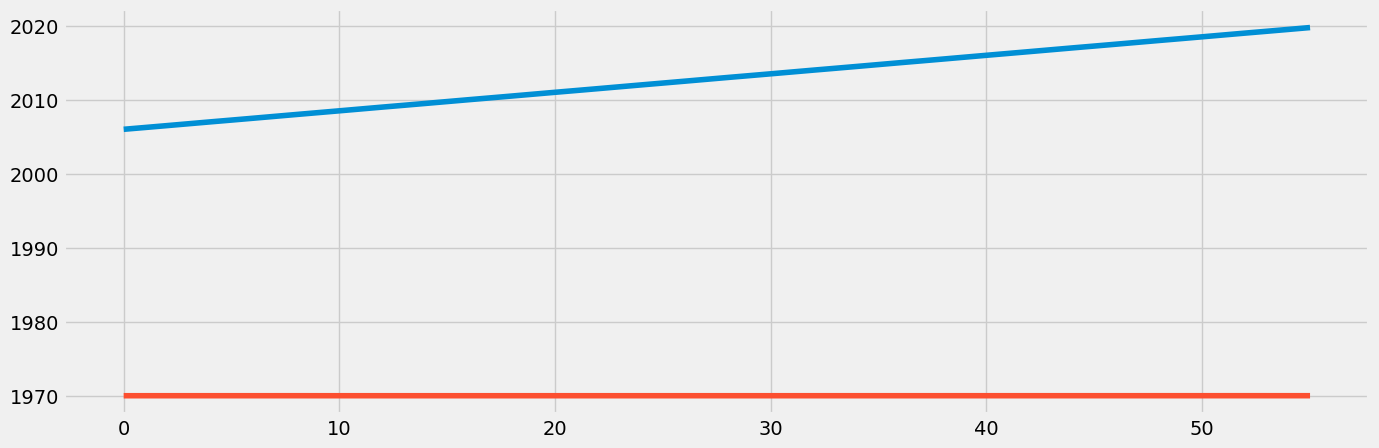

In [63]:
#plotting the data using matplotlib.
plt.figure(figsize=(15,5), dpi=100) 
plt.plot(df_job)

## 3. Cleaning, wrangling, and subsetting data

In [64]:
#creating a subset and filtering by years 2006 - 2015
df_sub = df_job.loc[(df_job['Quarter'] < '2016-01-01')]

In [65]:
#checking output
df_sub

,Quarter,Job Vacancy Rate
0,2006-01-01,1.0
1,2006-04-01,1.4
2,2006-07-01,1.5
3,2006-10-01,1.3
4,2007-01-01,1.5
5,2007-04-01,1.5
6,2007-07-01,1.5
7,2007-10-01,1.6
8,2008-01-01,1.7
9,2008-04-01,1.4


In [66]:
df_sub.shape

(40, 2)

In [67]:
#setting the "Quarter" column as the index

from datetime import datetime

df_sub = df_sub.set_index('Quarter') 
df_sub.head()

,Job Vacancy Rate
Quarter,
2006-01-01,1.0
2006-04-01,1.4
2006-07-01,1.5
2006-10-01,1.3
2007-01-01,1.5


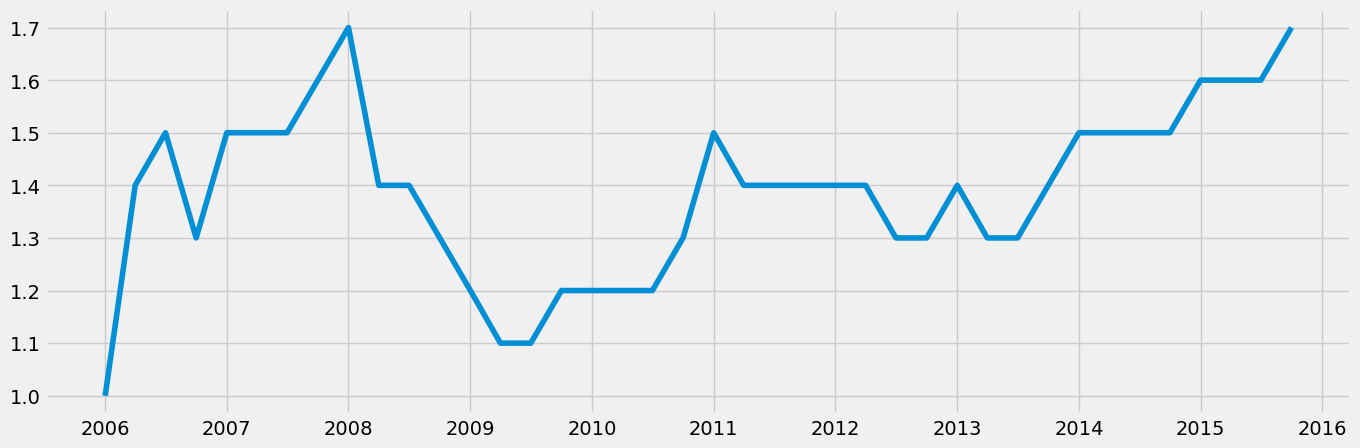

In [68]:
#plotting dataset
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub)

In [69]:
#checking for missing values
df_sub.isnull().sum()

Job Vacancy Rate    0
dtype: int64

In [70]:
#checking for duplicates
dups = df_sub.duplicated()
dups.sum()

32

Although the values are coming up as duplicated, if we look at the dataset we see a number of the job vacancy values are the same. So in this instance we can disregard. 

## 4. Time-series analysis: decomposition

In [45]:
#decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_sub, model='additive')

In [46]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

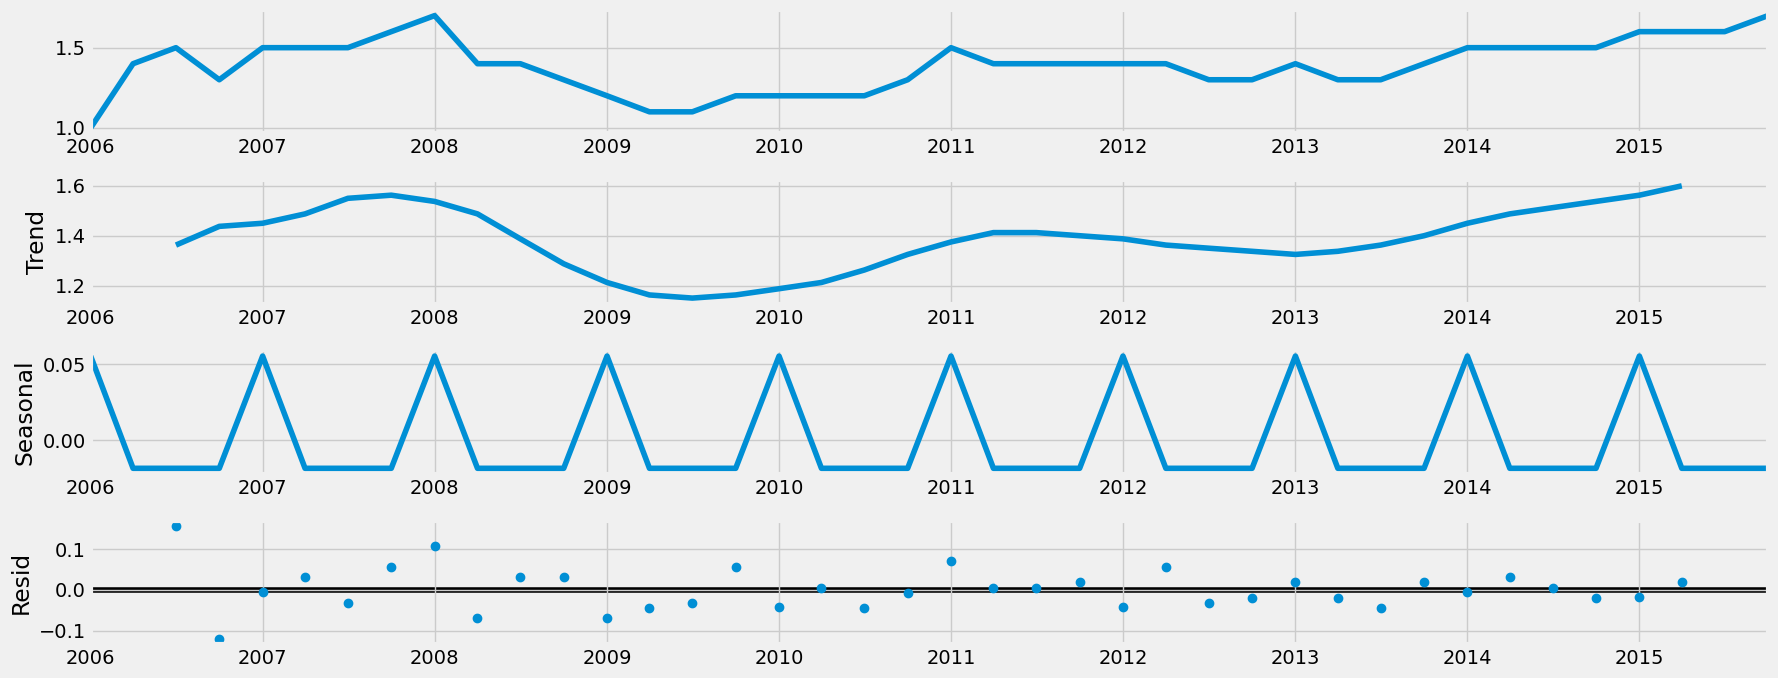

In [47]:
# Plot the separate components

decomposition.plot()
plt.show()

## 5. Testing for stationarity and autocorrelation

In [49]:
def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_sub['Job Vacancy Rate'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.756064
p-value                         0.064829
Number of Lags Used             0.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64


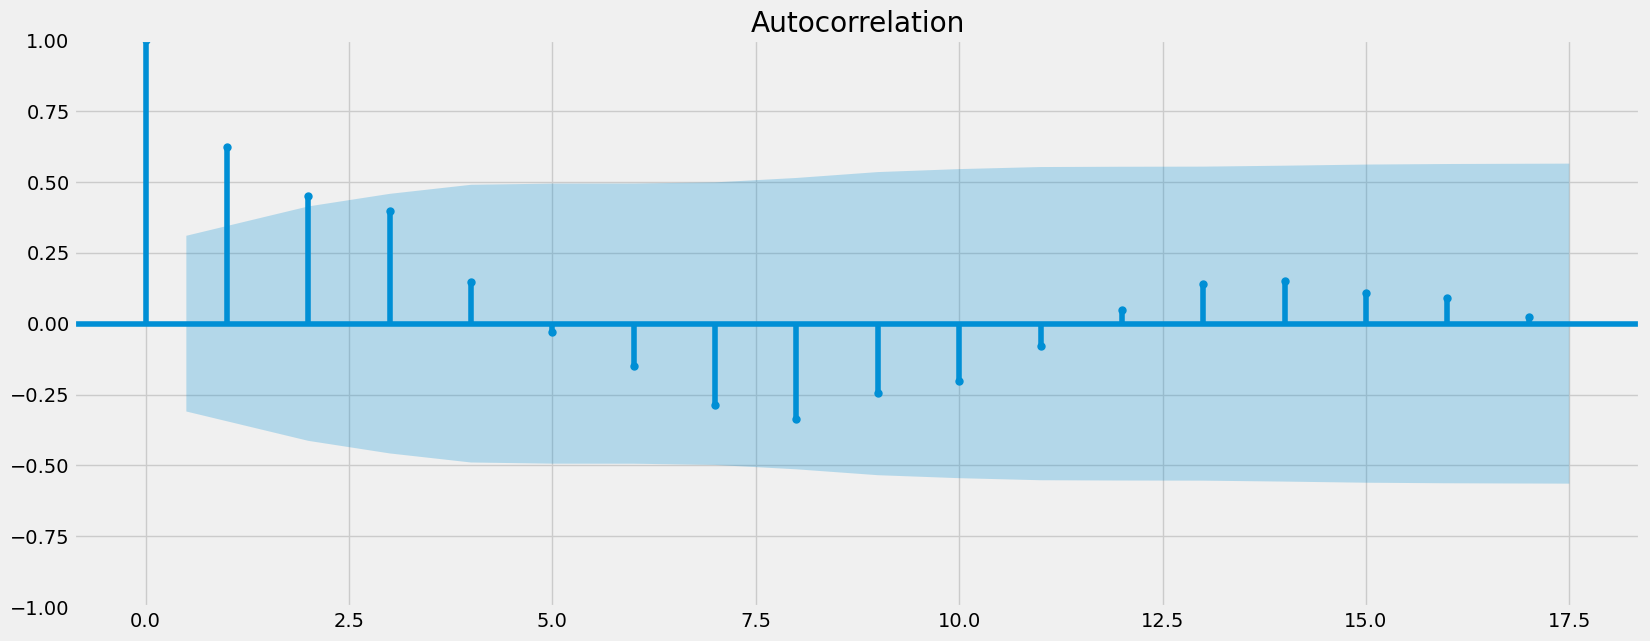

In [50]:
#plotting autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #importing the autocorrelation and partial correlation plots

plot_acf(df_sub)
plt.show()

**Results:** 

The Dickey-Fuller test that looks for the presence of a *unit-root* in the data. A unit-root is any kind of random jump that can't be explained by variation in the data. The null hypothesis in this case would be the *there is a unit root in the data*. We want to disprove that and therefore reject the null hypothesis, which would mean that the data is stationary. 

The results of the Dickey-Fuller statistical test show a test-statistic of **-2.756064** which is **bigger** than the corresponding critical value of **-2.939109**, meaning there is no unit-root in our data so we *can* reject the null hypothesis and determine that our data is stationary. However, the p-value is 0.064829, which is marginally **greater than 0.05** meaning that this test result is *not* statistically significant. Again, statistical significance would be difficult to prove in a dataset with so few values. 

The second plot looks at autocorrelation in the data. The vertical lines represent the time-lags in our data whilst the blue shared area represents the confidence intervals. We can clearly see the 9 of the 10 lag values within the blue-shared area, meaning there is limited autocorrelation in this dataset, therefore, it is likely stationary. 

## 6. Data differencing

The autocorrelation chart shows at least two values not within the the confidence interval, therefore our stationarity could be perceived as *weak*. I will therefore use **differencing** in order to improve the stationarity. 

In [71]:
data_diff = df_sub - df_sub.shift(1) 
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [72]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [73]:
data_diff.head()

,Job Vacancy Rate
Quarter,
2006-04-01,0.4
2006-07-01,0.1
2006-10-01,-0.2
2007-01-01,0.2
2007-04-01,0.0


In [74]:
data_diff.columns

Index(['Job Vacancy Rate'], dtype='object')

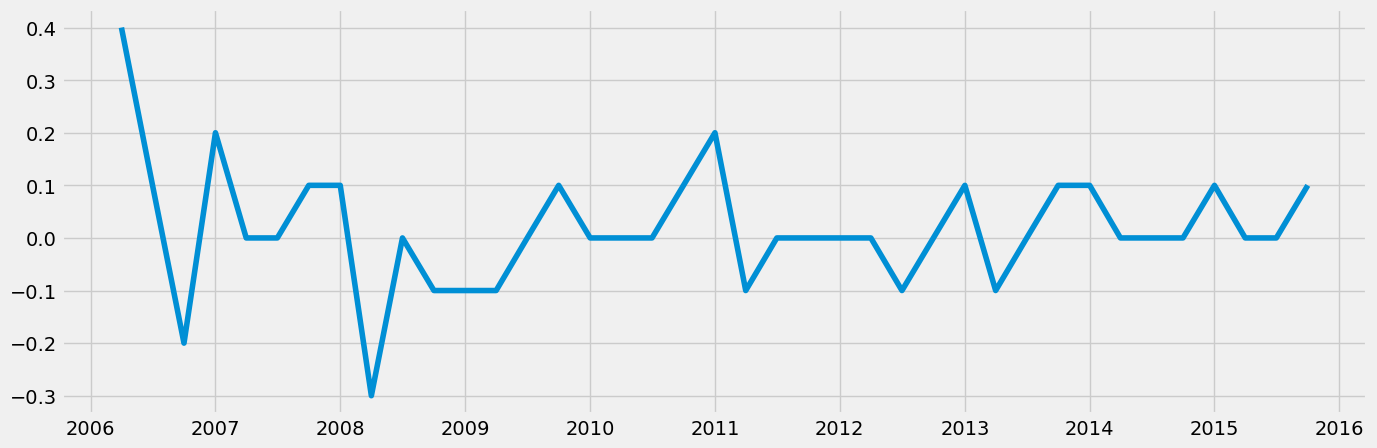

In [75]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [76]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.138061
p-value                         0.229488
Number of Lags Used             5.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64


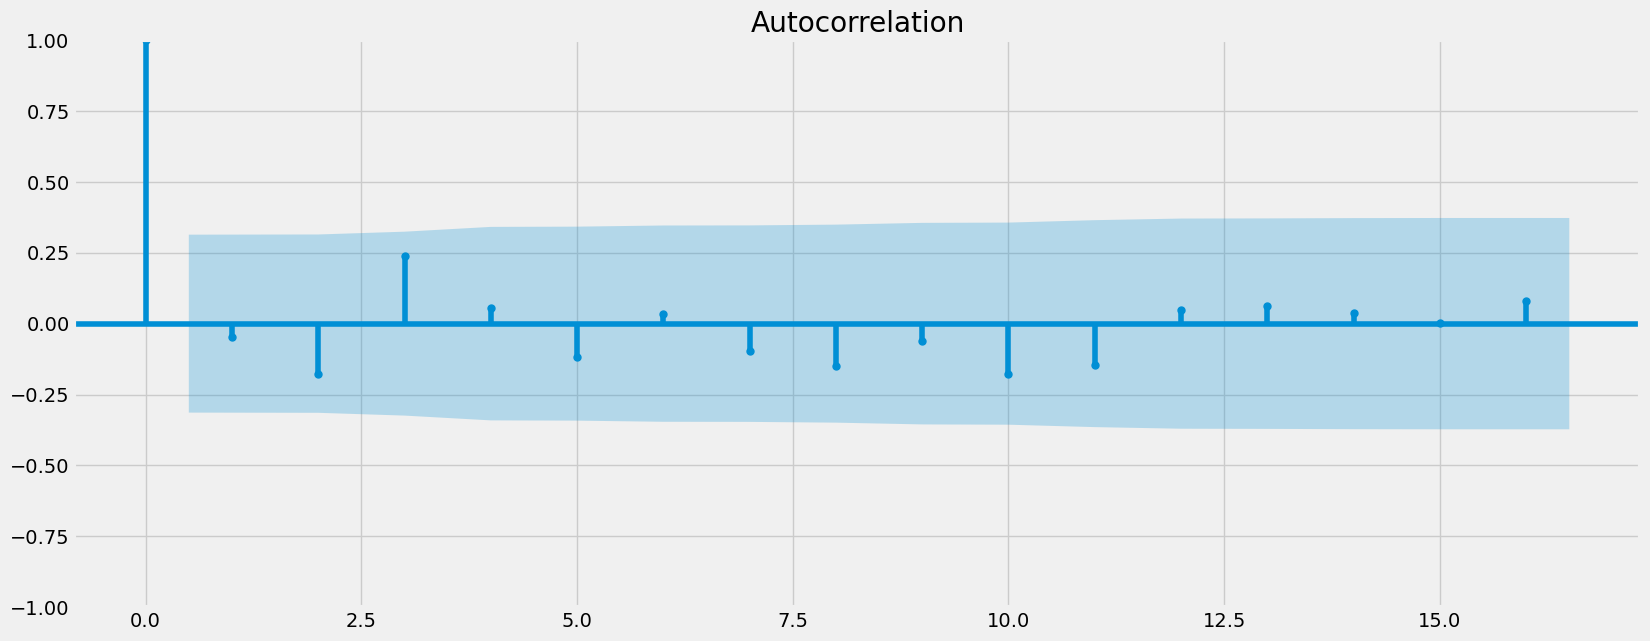

In [77]:
plot_acf(data_diff)
plt.show()

**Results:**

The autocorrelation report shows *more* values within the confidence interval, however, our p-value has increased from 0.064829 to  0.229488, so it's now even less statistically significant a result.  